# BE/Bi 103, Fall 2015: Homework 6

## Due 1pm, Monday, November 16

*This document was generated from a Jupyter notebook.  You can download the notebook [here](hw6.ipynb).*

### Problem 6.1: Microtubule catastrophe, 70 pts + 15 pts extra credit

In [Homework 1](hw1.html), we plotted data of microtubule catastrophe times.  In this problem, we return to the data from the [Gardner, Zanic, et al. paper](../protected/papers/gardner_2011.pdf)  We will carefully analyze the data and make some conclusions about the processes underlying microtubule catastrophe.  You can download the data set [here](../protected/data/gardner_hw6.zip).

In the file `gardner_mt_catastrophe_only_tubulin.csv`, we have observed catastrophe times of microtubules with different concentrations of tubulin.  So, our data set $D$ consists of a set of measurements of the amount of time to catastrophe; $D = \{t_i\}$.  To model microtuble catastrophe, we will assume that a series of $m$ processes must occur sequentially to trigger catastrophe.  This could be separate depolymerization events, binding of auxiliary proteins, etc.  We assume that each of these processes is a Poisson process, and that process $j$ occurs with rate $1/\tau_j$.  Our goal here is to do model selection to determine the value of $m$.

As we have learned, the model specifies the likelihood.  We will assume all microtubule catastrophes are independent, so the likelihood for all of our observed catastrophes 

\begin{align}
P(\left\{t_i\right\}\mid \{\tau_j\}, m, I) = \prod_i P(t_i\mid \{\tau_j\}, m, I).
\end{align}

**a)** Explain why the probability distribution for catastrophe times for a three-step process ($m=3$) is

\begin{align}
P(t\mid \tau_1, \tau_2, \tau_3, 3, I) = \frac{1}{\tau_1\tau_2\tau_3}\int_0^t\mathrm{d}t_1 \int_{t_1}^t\mathrm{d}t_2\, \mathrm{e}^{-t_1/\tau_1}\,\mathrm{e}^{-(t_2-t_1)/\tau_2}\,\mathrm{e}^{-(t-t_2)/\tau_3}.
\end{align}

The probability for a single event happening between time t and time t + dt is Poisson distributed:
\begin{align}
P(t_i\mid \tau_i, I)dt &= \lambda_i\mathrm{e}^{-\lambda_i t}dt & \text{where } \lambda_i = \frac{1}{\tau_i}\\
P(t_i\mid \tau_i, I)dt &= \frac{1}{\tau_i}\mathrm{e}^{-\text{time interval}/\tau_i}dt
\end{align}
For the catastrophe to happen, the first event must happen at any time from $t_0$ to $t$. The probability it will happen in the right time interval is:
\begin{align}
P(t_1\mid \tau_i, I) = \int_0^t\mathrm{d}t_1\frac{1}{\tau_1}\mathrm{e}^{-t_1/\tau_1}
\end{align}
For the catastrophe to happen, the second event must happen after $t_1$, so it can happen at any time from $t_1$ to $t$, so the probability it will happen in the right time interval is:
\begin{align}
P(t_2\mid \tau_2, I) = \int_{t_1}^t\mathrm{d}t_2\frac{1}{\tau_2}\mathrm{e}^{-(t_2-t_1)/\tau_2}
\end{align}
For the catastrophe to happen, the third event must happen after $t_2$. It can happen at any time from $t_2$ to $t$, so the probability it will happen in the right time interval is:
\begin{align}
P(t_3\mid \tau_3, I) = \int_{t_2}^t\mathrm{d}t_3\frac{1}{\tau_3}\mathrm{e}^{-(t_3-t_2)/\tau_3}
\end{align}
but we also know that $t_3$ happens at $t_3$, and $t_3 = t$, so in fact:
\begin{align}
P(t_3\mid \tau_3, I) &= \int_{t_3}^t\mathrm{d}t\frac{1}{\tau_3}\mathrm{e}^{-(t_3-t_2)/\tau_3}\\
&= \frac{1}{\tau_3}\mathrm{e}^{-(t-t_2)/\tau_3}
\end{align}
Now:
\begin{align}
P(\left\{t_i\right\}\mid \{\tau_j\}, m, I) = \prod_i P(t_i\mid \{\tau_j\}, m, I).
\end{align}

so
\begin{align}
P(t\mid \tau_1, \tau_2, \tau_3, 3, I) = \frac{1}{\tau_1\tau_2\tau_3}\int_0^t\mathrm{d}t_1 \int_{t_1}^t\mathrm{d}t_2\, \mathrm{e}^{-t_1/\tau_1}\,\mathrm{e}^{-(t_2-t_1)/\tau_2}\,\mathrm{e}^{-(t-t_2)/\tau_3}.
\end{align}


**b)** The above expression for general $m$ can be integrated, giving

\begin{align}
P(t\mid \{\tau_j\}, m, I) = \sum_{j=1}^m \frac{\tau_j^{m-2}\,\mathrm{e}^{-t/\tau_j}}{\prod_{k=1,k\ne j}^m (\tau_j - \tau_k)}.
\end{align}

For clarity, the probability distributions for the first few $m$ are

\begin{align}
P(t\mid \tau_1, 1, I) &= \frac{\mathrm{e}^{-t/\tau_1}}{\tau_1},\\[1em]
P(t\mid \tau_1, \tau_2, 2, I) &=
\frac{\mathrm{e}^{-t/\tau_1}}{\tau_1 - \tau_2} + \frac{\mathrm{e}^{-t/\tau_2}}{\tau_2 - \tau_1}
= \frac{\mathrm{e}^{-t/\tau_2} - \mathrm{e}^{-t/\tau_1}}{\tau_2 - \tau_1} \\[1em]
P(t\mid \tau_1, \tau_2, \tau_3, 3, I) &=
\frac{\tau_1\,\mathrm{e}^{-t/\tau_1}}{(\tau_1 - \tau_2)(\tau_1-\tau_3)}
+\frac{\tau_2\,\mathrm{e}^{-t/\tau_2}}{(\tau_2 - \tau_1)(\tau_2-\tau_3)}
+\frac{\tau_3\,\mathrm{e}^{-t/\tau_3}}{(\tau_3 - \tau_1)(\tau_3-\tau_2)}
\end{align}

Note that these probability distributions assume that no two of the $\tau_j$'s are equal, and you should explicitly ensure this in your calculations.  If any two $\tau_j$'s are equal, you need to take a limit, e.g.,

\begin{align}
\lim_{\tau_2\to\tau_1} P(t\mid \tau_1, \tau_2, 2, I) &= \frac{t^2}{2\tau_1}\,\mathrm{e}^{-t/\tau_1},
\end{align}

in this case, as gamma distribution.  Not to worry; we will not include this limit in our analysis here.

In fact, you should specify $\tau_1 < \tau_2 < \cdots < \tau_m$.  Why is this ok to do, and why should you do it?

#### Why is this OK to do?
The events cannot have the same rates, because the rates are a real number (although the rates can be arbitrarily close to each other!). Even if all the events are the same "type" of event (e.g. hydrolysing GTP 3 times), the rates not be exactly equal.
The mathematics are indifferent to which event is given which label, so we can decide that $\tau_1 < \tau_2 < \cdots < \tau_m$
#### Why should you do it?
We need a positive probability. If $\tau_1 < \tau_2 < \cdots < \tau_m$ is not true then the denominators for some terms in P might go negative, so the overall probability might be negative.

**c)** For the trials where the tubulin concentration is 12 µM (from the file `gardner_mt_catastrophe_only_tubulin.csv`), perform parameter estimation for the $\{\tau_j\}$ and model selection for various values of $m$.  Report the results with clear graphics and discussion.  

*Hint*: Computing the log of the sum of exponentials while dealing with machine precision is a tricky business, and something that comes up often in probability.  Here is my advice.  Say you are computing $\ln(\mathrm{e}^a - \mathrm{e}^b + \mathrm{e}^c)$ with $a>b>c$.  We have

\begin{align}
\ln(\mathrm{e}^a - \mathrm{e}^b + \mathrm{e}^c) = \ln\left(\mathrm{e}^a(1 - \mathrm{e}^{b-a} + \mathrm{e}^{c-a})\right)
= a + \ln(1 - \mathrm{e}^{b-a} + \mathrm{e}^{c-a}).
\end{align}

This latter expression is much easier to compute numerically because all entries in the sum inside the logarithm at less than or equal to one, given that $a$ is the largest argument to the exponentials.  This procedure is implement in `scipy.misc.logsumexp()`. Be sure to check out the `b` kwarg.

In [39]:
import warnings

import sys
sys.path.append ('/Users/seinchin/Documents/Caltech/Bi 103/bebi103_utils')
import bebi103
# Our numerical workhorses
import numpy as np
import pandas as pd

#Differential equation numerical solver
from scipy.integrate import odeint

# Import pyplot for plotting
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

# Seaborn, useful for graphics
import seaborn as sns

# To compute symbolic expressions
import sympy

# Our hammer
import emcee

# print outputs in LaTeX
sympy.init_printing(use_unicode=True) 

# Interactive manipulations in the notebook
# from ipywidgets import StaticInteract, RangeWidget, RadioWidget
import ipywidgets

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline.  There is a bug, so uncomment if it works.
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [40]:
# sympy functions are from recitation 6.

# define the variable for the time and the number of processes]
# We will also include the j and k from the product
t= sympy.symbols('t')
def p_catastrophe(m=3):
    taus=sympy.symbols('tau:%d'%(m+1))[1:]
    p = list() # initialize list to keep sum terms
    for tau in taus:
        numerator = tau**(m - 2) * sympy.exp(- t / tau)
        denominator = list() # initialize list to keep denominator terms
        for tau_2 in taus:
            if tau_2 != tau:
                denominator.append(tau - tau_2)
        p.append(numerator / np.prod(denominator))
    return np.sum(p)

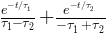

In [232]:
taus = sympy.symbols('tau:6')[1:]
p = []
p_func = []
for i in range(6):
    p.append(p_catastrophe(i))
    
    arg_list = [t]
    [arg_list.append(taus[j]) for j in range(i)]
    p_func.append(sympy.lambdify(arg_list, p[i]))
    
p[2]

In [235]:
# p_func[m]() is the probability function for m.
# It is called by p_func[m](t, tau_1, tau_2, ..., tau_m) e.g.
p_func[2](5, 2,1)

How do these functions look?

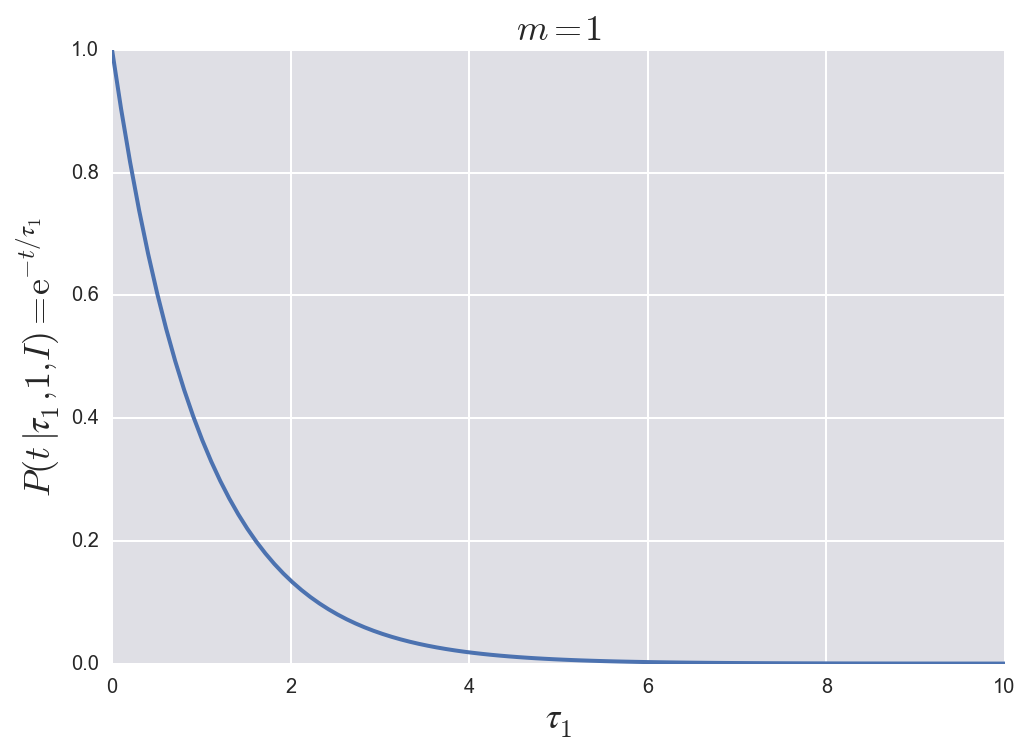

In [11]:
x = np.linspace(0,10,100)
y = [p_func[1](t,1) for t in x]
_ = plt.plot(x,y)
_ = plt.title('$m=1$')
_ = plt.ylabel('$P(t\mid τ_1, 1, I) = \mathrm{e}^{-t/τ_1}$')
_ = plt.xlabel('$τ_1$')

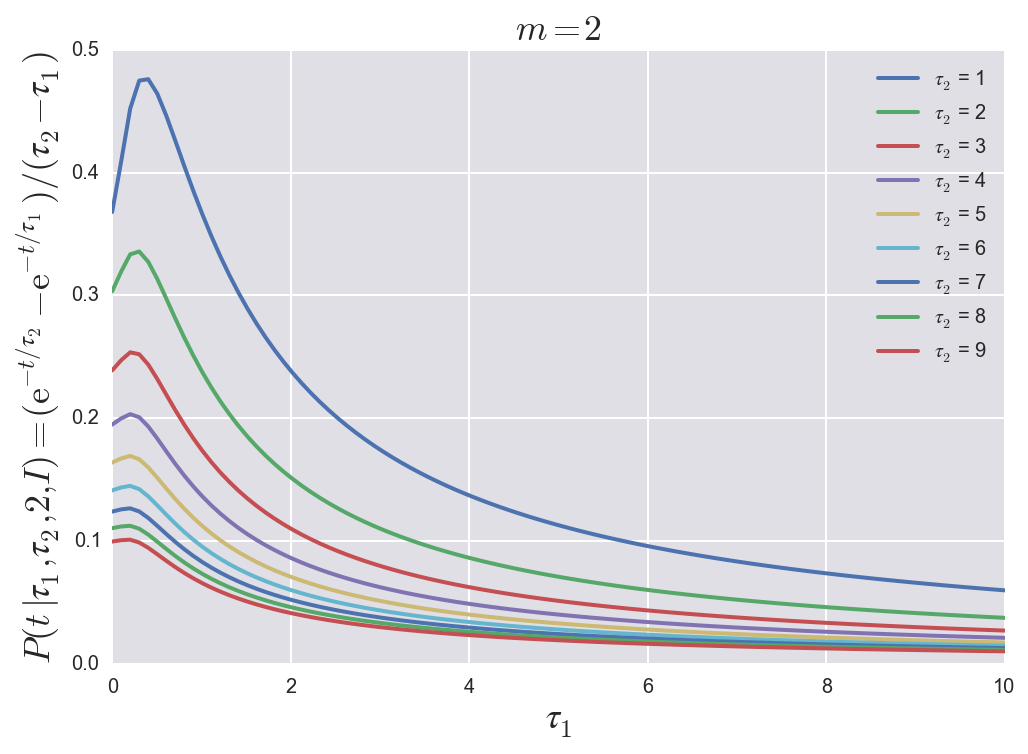

In [12]:
x = np.linspace(0,10,100)
legend = []
for j in range(1,10):
    y = [p_func[2](1,i,j) for i in x]
    _ = plt.plot(x,y)
    legend.append('$τ_2$ = %s' % j)
_ = plt.legend(legend)
_ = plt.title('$m=2$')
_ = plt.ylabel('$P(t\mid τ_1, τ_2, 2, I) = (\mathrm{e}^{-t/τ_2} - \mathrm{e}^{-t/τ_1})/(τ_2 - τ_1)$')
_ = plt.xlabel('$τ_1$')

What does our data look like?

In [225]:
data = pd.read_csv('data/gardner_hw6/gardner_mt_catastrophe_only_tubulin.csv', 
                   comment='#')

In [69]:
data.columns

Index(['12 uM', '7 uM', '9 uM', '10 uM', '14 uM'], dtype='object')

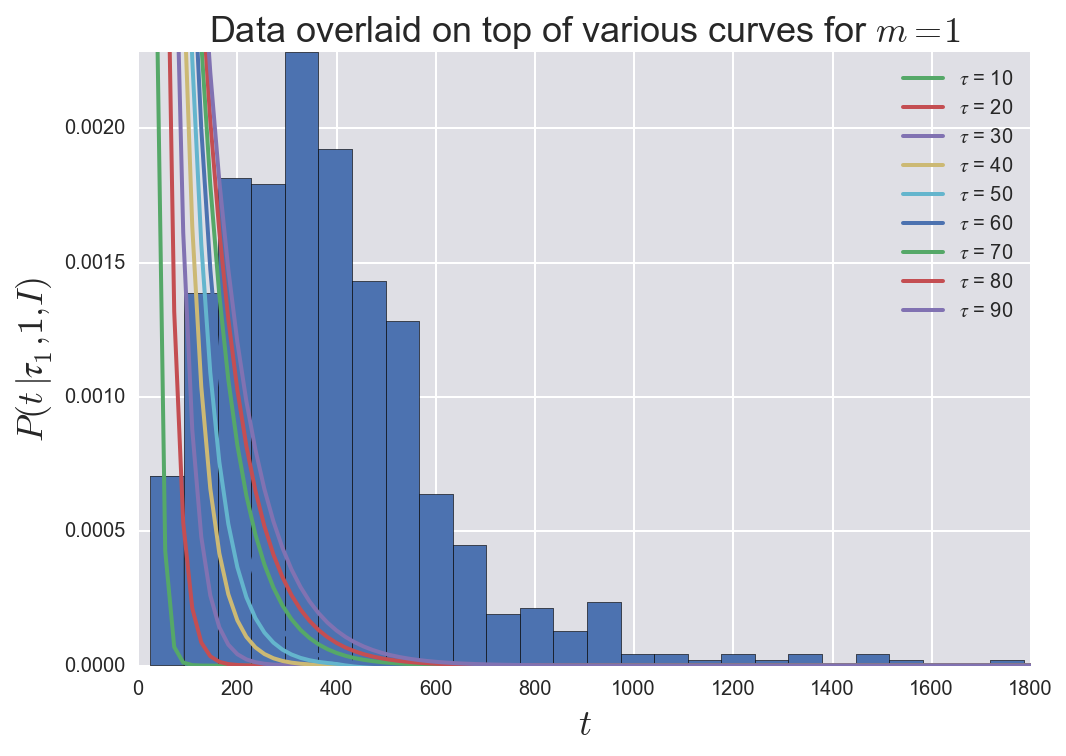

In [18]:
# Plot data
bins = int(np.sqrt(len(data['12 uM'])))
histogram = plt.hist(data['12 uM'], normed=True, bins=bins)

# Plot m=1 curves
x = np.linspace(0,1800,100)
legend = []
for tau in range(10, 100, 10):
    y = [p_func[1](t,tau) for t in x]
    _ = plt.plot(x,y)
    legend.append('$τ$ = %s' % tau)
_ = plt.legend(legend)
_ = plt.title('Data overlaid on top of various curves for $m=1$')
_ = plt.ylabel('$P(t\mid τ_1, 1, I)$')
_ = plt.xlabel('$t$')
_ = plt.ylim(0, max(histogram[0]))

This is boring, let's try an interactive plot for the other values of m:

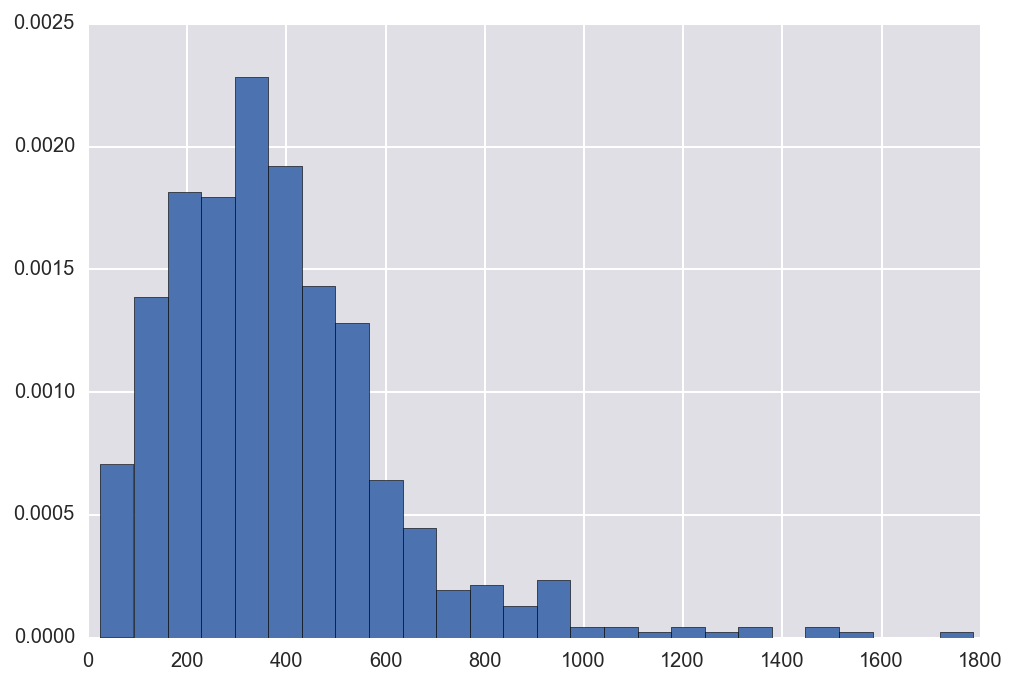

In [248]:
def plotcatastrophecurve(m, tau1, tau2, tau3, tau4, tau5):
    # Plot data
    bins = int(np.sqrt(len(data['12 uM'])))
    histogram = plt.hist(data['12 uM'], normed=True, bins=bins)

    if tau1 < tau2 < tau3 < tau4 < tau5:
        #print(histogram)
        # Plot m=1 curves
        x = np.linspace(1,1800,100)
        args = [t]
        args += ([[tau1, tau2, tau3, tau4, tau5][i] for i in range(1,m)])
        y = [p_func[m](t, *args) for t in x]
        _ = plt.plot(x,y)
        _ = plt.title('Data overlaid on top of various theoretical curves')
        _ = plt.ylabel('$P(t\mid \{τ_i\}, m, I)$')
        _ = plt.xlabel('$t$')
        _ = plt.ylim(0, max(histogram[0]))
    else:
        print('Warning: taus must be in ascending order, move sliders so tau1<tau2<tau3<tau4<tau5')

# This should be executed in an IPython notebook!
ipywidgets.interact(plotcatastrophecurve, m=(1,5,1), tau1=(0, 300, 30), tau2=(0, 300, 30), tau3=(0, 300, 30), tau4=(0, 300, 30), tau5=(0, 300, 30));



It's clear that m=1 is not correct (there should be a maximum at t=/=0, m=1 cannot do this. However, let's do model selection on 2<=m<=5.
Just by playing around with the sliders, it looks like m=3, tau1=90, tau2=120, tau3=150 is fairly good. Let's see whether model selection agrees.

First, let's estimate the parameters for each model. We will assume a Jeffreys prior on each $\tau$. Then, we will do pt-mcmc to estimate the parameters for each model. Conveniently, those results will also help us to do model selection. (Unfortunately, extrapolating from some timeit statements seemed to indicate that each of these would take about a week to run...).  

In [226]:
# p_func[m]() is the probability function for m.
# It is called by p_func[m](t, tau_1, tau_2, ..., tau_m) e.g.
# p_func[5](5, 1, 2, 3, 4, 5)
from scipy.misc import logsumexp
def log_p_failure(taus, t):
    m = len(taus)
    p = list() # initialize list to keep sum terms
    a = np.empty(len(taus))
    b = np.empty(len(taus))
    for i,tau in enumerate(taus):
        a[i] = -t/tau
        numerator = tau**(m - 2)
        denominator = list() # initialize list to keep denominator terms
        for tau_2 in taus:
            if tau_2 != tau:
                denominator.append(tau - tau_2)
        b[i] = (numerator / np.prod(denominator))
    return logsumexp(a, b=b)

# let's define a log likelihood function
def log_likelihood (taus, ts):
    log_ps = [log_p_failure(taus,t) for t in ts]
    return np.sum(log_ps)

def log_prior (taus):
    m = len(taus)
    for i,tau in enumerate(taus):
        if tau < 0:
            return -np.inf
        if tau > 50000:
            return -np.inf
        if i < m-1:
            if tau >= taus[i+1]:
                return -np.inf
    log_prior = -np.sum(np.log(taus))
    return log_prior

In [227]:
def log_posterior (taus, ts):
    try:
        lp = log_likelihood(taus, ts) + log_prior(taus)
    except:
        return -np.inf
    return lp

def neg_log_posterior (taus, ts):
    return -log_posterior (taus, ts)

So let's try to estimate the parameters by minimizing the negative log posterior instead. 

In [228]:
from scipy.optimize import minimize
from scipy.integrate import quad
def log_post (t, taus):
    return log_posterior (taus, t)
opt_dict = {}
times = data['12 uM']
for m in range (2,5):
    res = minimize (neg_log_posterior, [10.*r for r in range(1,m+1)], 
                    args=(times), method='L-BFGS-B',
                   bounds=[(1e-5, None) for _ in range(m)])
    print (res)
    opt_dict[m] = res.x

  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
   status: 0
      nit: 15
  success: True
     nfev: 117
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0.])
        x: array([ 189.86084981,  190.18448629])
      fun: 4672.180567575534
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
   status: 0
      nit: 30
  success: True
     nfev: 232
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00291038,  0.00227374,  0.00181899])
        x: array([  99.87634592,  100.4433748 ,  179.70241567])
      fun: 4650.6301409148946
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
   status: 0
      nit: 26
  success: True
     nfev: 330
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([  9.99499327e+04,   1.63709046e-03,   4.00177669e-03,
         2.45563569e-03])
        x: array([  1.00000000e-05,   9.95685632e+01,   1.00410506e+02,
         1.80128717e+02])
      fun: 4639.

m = 2
taus = [ 189.86084981  190.18448629] s
m = 3
taus = [  99.87634592  100.4433748   179.70241567] s
m = 4
taus = [  1.00000000e-05   9.95685632e+01   1.00410506e+02   1.80128717e+02] s


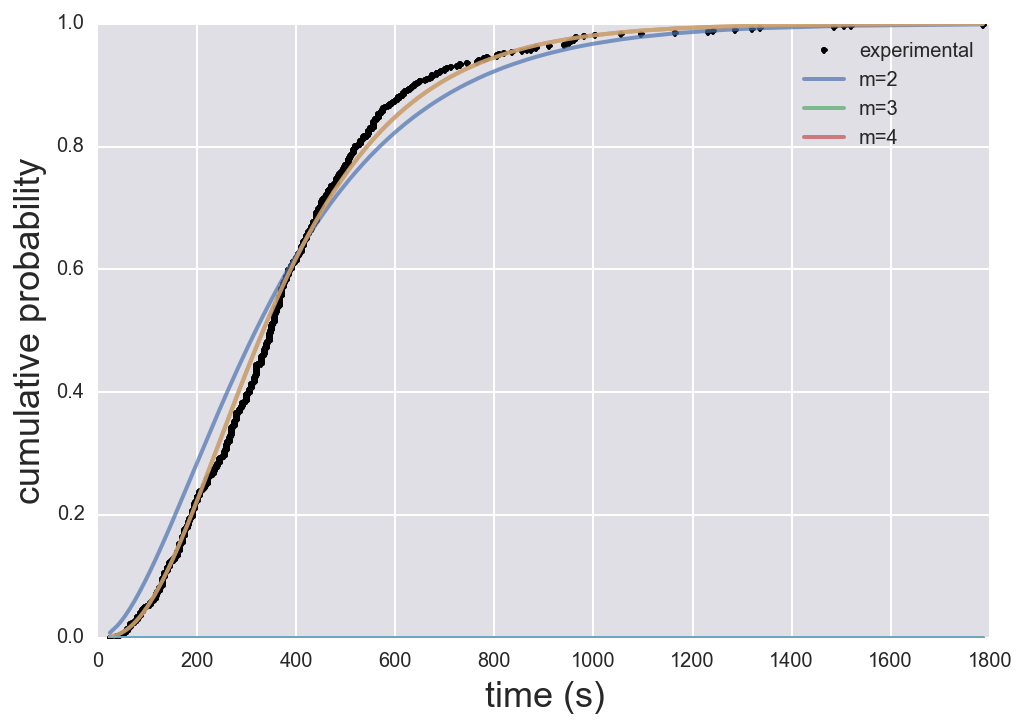

In [229]:
y = np.arange(len(times)) / len(times)
x = np.sort(times.values)

# Plot
def pfunc(t,m,taus):
    return p_func[m](t, *taus)
_ = plt.plot(x, y, 'k.')
for m in opt_dict.keys():
    print ('m = %d' %m)
    print ('taus = ' + str(opt_dict[m]) + ' s')
    _ = plt.plot(x, [quad(pfunc, 0, t, args=(m,opt_dict[m])) for t in x], 
                alpha=0.7)
    
plt.legend(['experimental', 'm=2', 'm=3', 'm=4'])
plt.xlabel('time (s)')
plt.ylabel('cumulative probability')

These seem to give fairly reasonable results and fits. What happens when we try to apply the Laplace approximation and estimate covariances?

In [230]:
import numdifftools as ndt
hes_fun = ndt.Hessian(log_posterior)
cov_dict = {}
for m in opt_dict.keys():
    hes = hes_fun(opt_dict[m], (times))
    print (hes)
    cov_dict[m] = -np.linalg.inv(hes)

[[-0.01042552 -0.0087681 ]
 [-0.0087681  -0.01041426]]
[[-0.01466981 -0.01401851 -0.01254771]
 [-0.01401851 -0.01463536 -0.01255394]
 [-0.01254771 -0.01255394 -0.01365988]]
[[        nan         nan         nan         nan]
 [        nan         nan         nan         nan]
 [        nan         nan         nan         nan]
 [        nan         nan         nan -0.01362561]]


/Applications/anaconda3/lib/python3.4/site-packages/numpy/lib/nanfunctions.py:739: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)
/Applications/anaconda3/lib/python3.4/site-packages/numpy/lib/nanfunctions.py:993: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)
/Applications/anaconda3/lib/python3.4/site-packages/numdifftools/core.py:610: UserWarning: All-NaN slice encountered
  warnings.warn(str(msg))


In [231]:
def log_odds_ratio (m1, m2):
    log_good_fit_ratio = log_likelihood(opt_dict[m1], times) - \
                                    log_likelihood(opt_dict[m2], times)
    log_occam_factor = (-np.log(2 * np.pi) + np.log(np.linalg.det(cov_dict[m1])) 
                    - np.log(np.linalg.det(cov_dict[m2]))) / 2
    return log_good_fit_ratio + log_occam_factor
print (np.exp(log_odds_ratio(4,3)))
print (np.exp(log_odds_ratio(4,2)))
print (np.exp(log_odds_ratio(2,3)))
print (cov_dict[4])

nan
nan
1.36774637448e-13
[[ nan  nan  nan  nan]
 [ nan  nan  nan  nan]
 [ nan  nan  nan  nan]
 [ nan  nan  nan  nan]]


In [31]:
def sample_ptmcmc(times, m, r_max=20, n_temps=20, n_walkers=100, n_burn=100, 
                  n_steps=500, threads=None):
    """
    Sample posterior using PTMCMC.
    
    times = array of failure times
    m = number of events leading to failure
    """

    
    # Columns headings for outputted DataFrames
    columns = ['tau+%d' %i for i in range(1,m+1)]
        
    # Parameters and how we start them
    p0 = np.empty((n_temps, n_walkers, m))
    for i in range(n_walkers):
        p0[:,i,0] = np.random.exponential(100)
        for j in range(1,m):
            p0[:,i,j] = p0[:,i,j-1]*1.5

    # Get samples
    return bebi103.run_pt_emcee(
        log_likelihood, log_prior, n_burn, n_steps, n_temps=n_temps, 
        n_walkers=n_walkers, p0=p0, columns=columns,
        loglargs=(times,), logpargs=[], threads=threads, 
        return_lnZ=True)

In [ ]:
df_2, lnZ_2, dlnZ_2 = sample_ptmcmc(data['12 uM'].values, 2, 
                                    n_burn=1000, n_steps=10000)

In [ ]:
df_3, lnZ_3, dlnZ_3 = sample_ptmcmc(data['12 uM'].values, 3, 
                                    n_burn=1000, n_steps=10000)

In [ ]:
df_4, lnZ_4, dlnZ_4 = sample_ptmcmc(data['12 uM'].values, 4, 
                                    n_burn=1000, n_steps=10000)

In [ ]:
df_5, lnZ_5, dlnZ_5 = sample_ptmcmc(data['12 uM'].values, 5, 
                                    n_burn=1000, n_steps=10000)

**d)** Using whichever model you found most probable when you computed the odds ratio for the 12 µM tubulin measurements, the values of the $\tau_j$'s for the other concentrations of tubulin.  Given that microtubules polymerize faster with higher tubulin concentrations, is there anything you can say about the occurrence of catastrophe by looking at the values of the $\tau_j$'s versus tubulin concentration?

In [221]:
m = 3
data.columns = ['12', '7', '9', '10', '14']
new_opt_dict = {}
for i in data.columns[1:]:
    print(i)
    times = data[i]
    res = minimize (neg_log_posterior, [100.*r for r in range(1,m+1)], 
                    args=(times), method='Powell')
                  # bounds=[(1e-5, None) for _ in range(m)])
    print (res)
    new_opt_dict[i] = res.x
    


7
    nfev: 3034
 message: 'Maximum number of function evaluations has been exceeded.'
  status: 1
     nit: 82
 success: False
   direc: array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])
       x: array([ 312.21017485,  412.21017485,  512.21017485])
     fun: nan
9
    nfev: 3034
 message: 'Maximum number of function evaluations has been exceeded.'
  status: 1
     nit: 82
 success: False
   direc: array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])
       x: array([ 312.21017485,  412.21017485,  512.21017485])
     fun: nan
10
    nfev: 3034
 message: 'Maximum number of function evaluations has been exceeded.'
  status: 1
     nit: 82
 success: False
   direc: array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])
       x: array([ 312.21017485,  412.21017485,  512.21017485])
     fun: nan
14
    nfev: 3034
 message: 'Maximum number of function evaluations has been exceeded.'
  status: 1
     nit: 82
 success: False
   dir

None of these seem to converge for some reason, despite trying a variety of solvers and guesses. 